# Quantum Integer Programming and Quantum Machine Learning 47-779/785, Tepper School of Business.
# Introduction to Quantum Computing 18-819F, Electrical and Computers Engineering.
# Fall 2021, Carnegie Mellon University

This notebook contains material from the Quantum Integer Programming and Quantum Machine Learning Course at CMU Fall 2021 by David Bernal (bernalde at cmu.edu), Sridhar Tayur (stayur at cmu.edu), Elias Towe (towe at cmu.edu), and Davide Venturelli; the content is available on **[Github](https://github.com/bernalde/QuIPML)**.
The text is released under the **[CC-BY-NC-ND-4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode) license, and code is released under the **[MIT license](https://opensource.org/licenses/MIT).*

Run in **[Google Colab](https://colab.research.google.com/github/bernalde/QuIPML/blob/master/notebooks/Notebook%204%20-%20Benchmarking.ipynb)**

## Benchmarking
With the new availability of unconventional hardware, novel algorithms, and increasingly optimized software to address optimization problems; the first question that arises is, which one is better?
We will call the combination of hardware, algorithm, and software within a solution method as a solver.
This question is also relevant when evaluating a single solver, given that usually they rely on hyperparameters, for which the quesiton now becomes into, which is the best parameter setting for a given solver?
These questions obviously depend on the problem that one is trying to solve. The solution of the problem also depends on the budget of resources that one has available.

In the case that the available resources are relatively "unlimited" and that the problem to solve is known, one could exhaustively try all the parameter settings within a delimited range for that instance and choose which one is the best.
This case is idealistic, in the sense that usually one does not know a-priori which problem is there to solve (and if while testing all the parameters you solve it, what would be the point of identifying the best parameters?), and that there exists limitations in terms of resources, e.g., time, memory, or energy, when trying to address these problems.
A case closer to reality is where you have the chance of solving problems that look similar to the one that you are interested in solving later, either because you have previously generated problems or you have identified a feature that characterizes your problem of interest and can generate random instances, which we will call as a family of instances.
Then, you can use a larger amount of resources to solve that family of problems "off-line", meaning that you spend extra resources to address the problems in your family of instances although it is unrelated to the actual application.
Finally, you would like to use the results that you found off-line as a guidance to solve your unknown problem more efficiently.

## Example
For illustration purposes, we will use an example that you are already familiar with, which is an Ising model. As a solver, we will use a simulated annealing code provided by D-Wave Ocean Tools.

## Ising model
This notebook will explain the basics of the Ising model. In order to implement the different Ising Models we will use D-Wave's packages **[dimod](https://github.com/dwavesystems/dimod)** and **[neal](https://github.com/dwavesystems/dwave-neal)**, for defining the Ising model and solving it with simulated annealing, respectively.

#### Problem statement
We pose the Ising problem as the following optimization problem:
$$
\min_{\sigma \in \{ -1,+1 \}^n} H(\sigma) =\min_{\sigma \in \{ -1,+1 \}^n} \sum_{(ij) \in E(G)} J_{ij}\sigma_i\sigma_j + \sum_{i \in V(G)}h_i\sigma_i + c_I
$$
where we optimize over spins $\sigma \in \{ -1,+1 \}^n$, on a constrained graph $G(V,E)$, where the quadratic coefficients are $J_{ij}$ and the linear coefficients are $h_i$. We also include an arbitrary offset of the Ising model $c_I$.

### Example 1
Suppose we have an Ising model defined from
$$
J_{0, 3}=24.0,J_{0, 4}=24.0,J_{0, 5}=24.0,J_{0, 7}=24.0,J_{0, 8}=24.0,J_{0, 9}=24.0,J_{0, 10}=24.0,\\
J_{1, 3}=24.0,J_{1, 5}=24.0,J_{1, 6}=24.0,J_{1, 8}=24.0,J_{1, 9}=24.0,J_{1, 10}=24.0,\\
J_{2, 4}=24.0,J_{2, 6}=24.0,J_{2, 7}=24.0,J_{2, 8}=24.0,J_{2, 9}=24.0,J_{2, 10}=24.0,\\
J_{3, 4}=24.0,J_{3, 5}=48.0,J_{3, 6}=24.0,J_{3, 7}=24.0,J_{3, 8}=48.0,J_{3, 9}=48.0,J_{3, 10}=48.0,\\
J_{4, 5}=24.0,J_{4, 6}=24.0,J_{4, 7}=48.0,J_{4, 8}=48.0,J_{4, 9}=48.0,J_{4, 10}=48.0,\\
J_{5, 6}=24.0,J_{5, 7}=24.0,J_{5, 8}=48.0,J_{5, 9}=48.0,J_{5, 10}=48.0,\\
J_{6, 7}=24.0,J_{6, 8}=48.0,J_{6, 9}=48.0,J_{6, 10}=48.0,\\
J_{7, 8}=48.0,J_{7, 9}=48.0,J_{7, 10}=48.0,\\
J_{8, 9}=72.0,J_{8, 10}=72.0,\\
J_{9, 10}=72.0 \\
J = \begin{bmatrix}
0 & 0 & 0 & 24 & 24 & 24 & 24 & 24 & 24 & 24 & 24\\
0 & 0 & 0 & 24 & 0 & 24 & 24 & 24 & 24 & 24 & 24\\
0 & 0 & 0 & 0 & 24 & 0 & 24 & 24 & 24 & 24 & 24\\
0 & 0 & 0 & 0 & 24 & 48 & 24 & 24 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 24 & 24 & 48 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 24 & 24 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 24 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 72 & 72\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 72\\
\end{bmatrix} \\
h^\top = [145.0,122.0,122.0,266.0,266.0,266.0,242.5,266.0,386.5,387.0,386.5] \\
c_I = 1319.5
$$
Let's solve this problem

In [1]:
# If using this on Google collab, we need to install the packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Let's start with Pyomo, dimod and neal
if IN_COLAB:
    !pip install -q pyomo
    !pip install dimod
    !pip install dwave-neal

In [2]:
# Import the Dwave packages dimod and neal
import dimod
import neal
# Import Matplotlib to generate plots
import matplotlib.pyplot as plt
# Import numpy and scipy for certain numerical calculations below
import numpy as np
import math
from collections import Counter
import pandas as pd
from itertools import chain
import time
import networkx as nx
import os
import pickle

In [3]:
# These could also be simple lists and numpy matrices
h = {0: 145.0, 1: 122.0, 2: 122.0, 3: 266.0, 4: 266.0, 5: 266.0, 6: 242.5, 7: 266.0, 8: 386.5, 9: 387.0, 10: 386.5}
J = {(0, 3): 24.0, (0, 4): 24.0, (0, 5): 24.0, (0, 7): 24.0, (0, 8): 24.0, (0, 9): 24.0, (0, 10): 24.0, (1, 3): 24.0, (1, 5): 24.0, (1, 6): 24.0, (1, 8): 24.0, (1, 9): 24.0, (1, 10): 24.0, (2, 4): 24.0, (2, 6): 24.0, (2, 7): 24.0, (2, 8): 24.0, (2, 9): 24.0, (2, 10): 24.0, (3, 4): 24.0, (3, 5): 48.0, (3, 6): 24.0, (3, 7): 24.0, (3, 8): 48.0, (3, 9): 48.0, (3, 10): 48.0, (4, 5): 24.0, (4, 6): 24.0, (4, 7): 48.0, (4, 8): 48.0, (4, 9): 48.0, (4, 10): 48.0, (5, 6): 24.0, (5, 7): 24.0, (5, 8): 48.0, (5, 9): 48.0, (5, 10): 48.0, (6, 7): 24.0, (6, 8): 48.0, (6, 9): 48.0, (6, 10): 48.0, (7, 8): 48.0, (7, 9): 48.0, (7, 10): 48.0, (8, 9): 72.0, (8, 10): 72.0, (9, 10): 72.0}
cI = 1319.5

model_ising = dimod.BinaryQuadraticModel.from_ising(h, J, offset=cI)



/tmp/ipykernel_30270/1437022254.py:1: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0, use bqm.to_networkx_graph() instead.
  nx_graph = model_ising.to_networkx_graph()


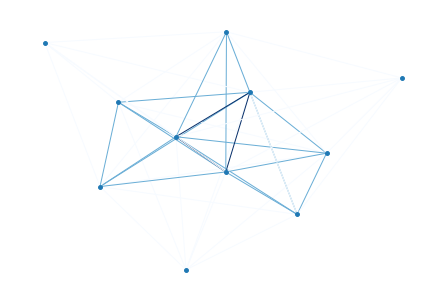

In [4]:
nx_graph = model_ising.to_networkx_graph()
edges, bias = zip(*nx.get_edge_attributes(nx_graph, 'bias').items())
bias = np.array(bias)
nx.draw(nx_graph, node_size=15, pos=nx.spring_layout(nx_graph),
        edgelist=edges, edge_color=bias, edge_cmap=plt.cm.Blues)


Since the problem is relatively small (11 variables, $2^{11}=2048$ combinations), we can afford to enumerate all the solutions.

In [5]:
exactSampler = dimod.reference.samplers.ExactSolver()
start = time.time()
exactSamples = exactSampler.sample(model_ising)
timeEnum = time.time() - start

In [6]:
# Some useful functions to get plots
def plot_enumerate(results, title=None):

    plt.figure()

    energies = [datum.energy for datum in results.data(
        ['energy'], sorted_by='energy')]

    if results.vartype == 'Vartype.BINARY':
        samples = [''.join(c for c in str(datum.sample.values()).strip(
            ', ') if c.isdigit()) for datum in results.data(['sample'], sorted_by=None)]
        plt.xlabel('bitstring for solution')
    else:
        samples = np.arange(len(energies))
        plt.xlabel('solution')

    plt.bar(samples, energies)
    plt.xticks(rotation=90)
    plt.ylabel('Energy')
    plt.title(str(title))
    print("minimum energy:", min(energies))


def plot_samples(results, title=None):
    plt.figure()
    if results.vartype == 'Vartype.BINARY':
        samples = [''.join(c for c in str(datum.sample.values()).strip(
            ', ') if c.isdigit()) for datum in results.data(['sample'], sorted_by=None)]
        plt.xlabel('bitstring for solution')
    else:
        samples = np.arange(len(energies))
        plt.xlabel('solution')

    counts = Counter(samples)
    total = len(samples)
    for key in counts:
        counts[key] /= total
    df = pd.DataFrame.from_dict(counts, orient='index').sort_index()
    df.plot(kind='bar', legend=None)

    plt.xticks(rotation=80)
    plt.ylabel('Probabilities')
    plt.title(str(title))
    plt.show()
    print("minimum energy:", min(energies))


def plot_energies(results, title=None, skip=1):
    # skip parameter given to avoid putting all xlabels
    energies = results.data_vectors['energy']
    occurrences = results.data_vectors['num_occurrences']
    counts = Counter(energies)
    total = sum(occurrences)
    counts = {}
    for index, energy in enumerate(energies):
        if energy in counts.keys():
            counts[energy] += occurrences[index]
        else:
            counts[energy] = occurrences[index]
    for key in counts:
        counts[key] /= total
    df = pd.DataFrame.from_dict(counts, orient='index').sort_index()
    ax = df.plot(kind='bar', legend=None)

    plt.xlabel('Energy')
    plt.ylabel('Probabilities')
    # Plot only a subset of xlabels (every skip steps)
    ax.set_xticklabels([t if not i % skip else "" for i,
                        t in enumerate(ax.get_xticklabels())])
    plt.title(str(title))
    plt.show()
    print("minimum energy:", min(energies))


minimum energy: 5.0


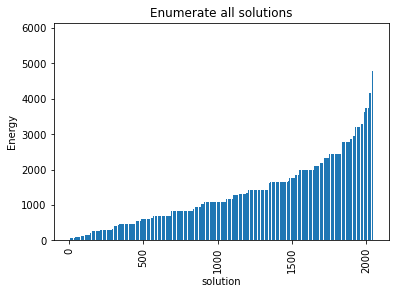

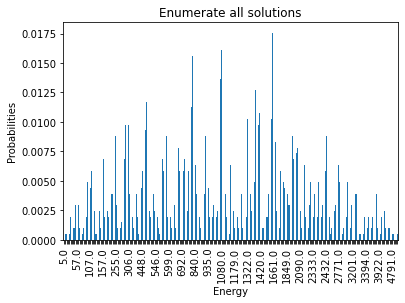

minimum energy: 5.0


In [7]:
plot_enumerate(exactSamples, title='Enumerate all solutions')
plot_energies(exactSamples, title='Enumerate all solutions', skip=10)

We observe that the optimal solution of this problem is $x_{10} = 1, 0$ otherwise, leading to an objective of $5$. Notice that this problem has a degenerate optimal solution given that $x_8 = 1, 0$ otherwise also leads to the same solution.

## Let's go back to the slides

Let's now solve this problem using Simulated Annealing

In [8]:
simAnnSampler = neal.SimulatedAnnealingSampler()
simAnnSamples = simAnnSampler.sample(model_ising, num_reads=1000)


minimum energy: 5.0


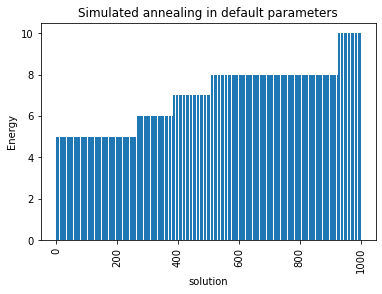

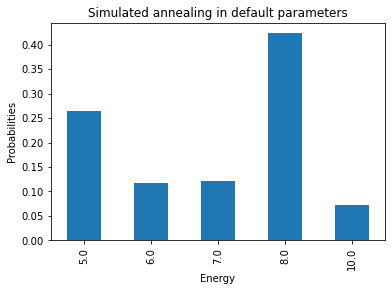

minimum energy: 5.0


In [9]:
plot_enumerate(simAnnSamples, title='Simulated annealing in default parameters')
plot_energies(simAnnSamples, title='Simulated annealing in default parameters')

We are going to use the default limits of temperature given by the simulating annealing code. These are defined using the minimum and maximum nonzero coefficients in the Ising model. Then the range for beta is defined as $\beta \in \left[ \frac{\log(2)}{\max \{ \Delta E \} },\frac{\log(100)}{\min \{ \Delta E \} } \right]$, where $\Delta E = \min \{h_i \} + \sum_j J_{ij}+J_{ji}$.

Hot temperature: We want to scale hot_beta so that for the most unlikely qubit flip, we get at least 50% chance of flipping. (This means all other qubits will have > 50% chance of flipping initially). Most unlikely flip is when we go from a very low energy state to a high energy state, thus we calculate hot_beta based on max_delta_energy.
$$
0.50 = \exp(-\overline{\beta} * \max \{ \Delta E \})
$$

Cold temperature: Towards the end of the annealing schedule, we want to minimize the chance of flipping. Don't want to be stuck between small energy tweaks. Hence, set cold_beta so that at minimum energy change, the chance of flipping is set to 1%.
$$
0.01 = \exp(-\underline{\beta} * \min \{ \Delta E \})
$$

By default, the schedule also follows a geometric series.

In [10]:
simAnnSamples.info

{'beta_range': [0.0008222386483510621, 0.19188209108283716],
 'beta_schedule_type': 'geometric'}

## Let's go back to the slides

Now let's compute an expected time metric with respect to the number of sweeps in simulated annealing.

In [335]:
s = 0.99
sweeps = list(chain(np.arange(1,10,1),np.arange(10,30,2), np.arange(30,50,5), np.arange(50,100,10) ,np.arange(100,1001,100)))
schedules = ['geometric','linear']
opt_energy = 5
p = {}
tts = {}
t = {}
for schedule in schedules:
    probs = []
    time_to_sol = []
    times = []
    for sweep in sweeps:
        start = time.time()
        samples = simAnnSampler.sample(model_ising, num_reads=1000, num_sweeps=sweep, beta_schedule_type=schedule)
        time_s = time.time() - start
        energies=samples.data_vectors['energy']
        occurrences = samples.data_vectors['num_occurrences']
        total_counts = sum(occurrences)
        counts = {}
        for index, energy in enumerate(energies):
            if energy in counts.keys():
                counts[energy] += occurrences[index]
            else:
                counts[energy] = occurrences[index]
        pr = sum(counts[key]
                 for key in counts.keys() if key <= opt_energy)/total_counts
        probs.append(pr)
        if pr == 0:
            time_to_sol.append(None)
        else:
            time_to_sol.append(time_s*math.log10(1-s)/math.log10(1-pr))
        times.append(time_s)
    p[schedule] = probs
    tts[schedule] = time_to_sol
    t[schedule] = times


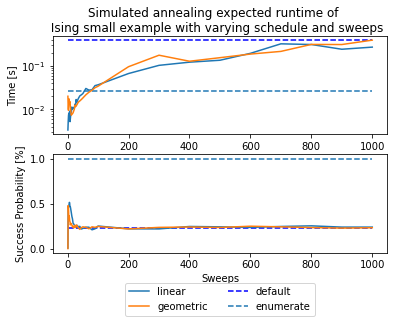

In [336]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Simulated annealing expected runtime of \n' +
             ' random Ising N=100 with varying schedule and sweeps')

ax1.semilogy(sweeps, t['linear'], '-', label='linear')
ax1.semilogy(sweeps, t['geometric'], '-', label='geometric')
ax1.hlines(t['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')
ax1.hlines(timeEnum, sweeps[0], sweeps[-1], linestyle='--', label='enumerate')

ax1.set(ylabel='Time [s]')


ax2.plot(sweeps, p['linear'], '-', label='linear')
ax2.plot(sweeps, p['geometric'], '-', label='geometric')
ax2.hlines(p['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')
ax2.hlines(1, sweeps[0], sweeps[-1], linestyle='--', label='enumerate')

ax2.set(ylabel='Success Probability [%]')
ax2.set(xlabel='Sweeps')

plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.25))


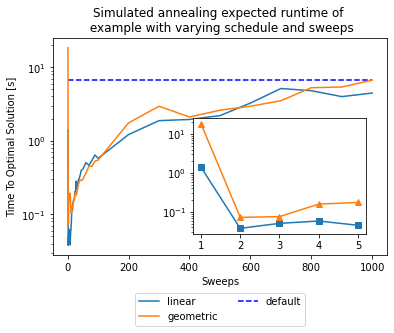

In [337]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.semilogy(sweeps, tts['linear'], '-', label='linear')
ax1.semilogy(sweeps, tts['geometric'], '-', label='geometric')

# Value for the default solution
ttsDefault = tts['geometric'][-1]
ax1.hlines(ttsDefault, sweeps[0], sweeps[-1], linestyle='--', label='default', colors='b')


plt.ylabel('Time To Optimal Solution [s]')
plt.xlabel('Sweeps')
plt.title('Simulated annealing expected runtime of \n' + ' example with varying schedule and sweeps')

ax2 = plt.axes([.45, .2, .4, .4])
ax2.semilogy(sweeps[0:5],tts['linear'][0:5],'-s')
ax2.semilogy(sweeps[0:5],tts['geometric'][0:5],'-^')

ax1.legend(ncol = 2, loc='upper center', bbox_to_anchor=(0.5, -0.15))


As you can notice, the default parameters given by D-Wave (number of sweeps = 1000 and a geometric update of $\beta$) are not optimal for our tiny example in terms of expected runtime.
This is certainly a function of the problem, for such a small instance having two sweeps are more than enough and more sweeps are an overkill.
This parameters choice might not generalize to any other problem, as seen below.

## Example 2
Let's define a larger model, with 100 variables and random weights, to see how this performance changes.

Assume that we are interested at the instance created with random weights coming from a seed of 42.

In [14]:
N = 100 # Number of variables
np.random.seed(42) # Fixing the random seed to get the same result
J = np.random.rand(N,N)
J = np.triu(J, 1) # We only consider upper triangular matrix ignoring the diagonal
h = np.random.rand(N)


In [15]:
model_random = dimod.BinaryQuadraticModel.from_ising(h, J, offset=0.0)

/tmp/ipykernel_30270/1579279843.py:1: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0, use bqm.to_networkx_graph() instead.
  nx_graph = model_random.to_networkx_graph()


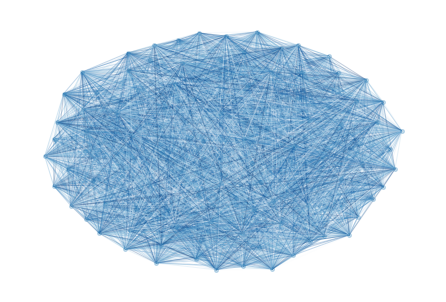

In [16]:
nx_graph = model_random.to_networkx_graph()
edges, bias = zip(*nx.get_edge_attributes(nx_graph, 'bias').items())
bias = np.array(bias)
nx.draw(nx_graph, node_size=15, pos=nx.spring_layout(nx_graph), alpha=0.25, edgelist=edges, edge_color=bias, edge_cmap=plt.cm.Blues)


In [17]:
start = time.time()
simAnnSamplesDefault = simAnnSampler.sample(model_random, num_reads=1000)
timeDefault = time.time() - start
energies = [datum.energy for datum in simAnnSamplesDefault.data(
        ['energy'], sorted_by='energy')]
min_energy = energies[0]
print(min_energy)


-236.4258051878277


minimum energy: -236.4258051878277


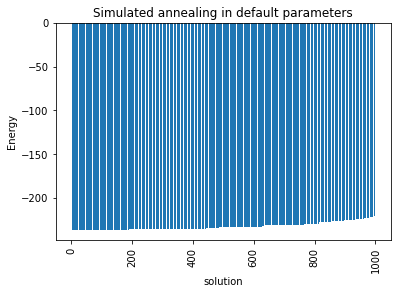

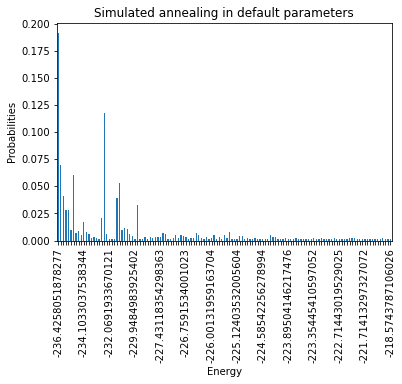

minimum energy: -236.4258051878277


In [18]:
plot_enumerate(simAnnSamplesDefault,
               title='Simulated annealing in default parameters')
plot_energies(simAnnSamplesDefault,
              title='Simulated annealing in default parameters', skip=10)


We can solve this problem using IP such that we have guarantees that it is solved to optimality (this might be a great quiz for future lectures), but in this case let us define the "success" as getting an objective better than the one obtained using the default setting of Simulated annealing listed below plus some treshold of 5.

In [19]:
simAnnSamples.info

{'beta_range': [0.0008222386483510621, 0.19188209108283716],
 'beta_schedule_type': 'geometric'}

Before figuring out if we have the right optimal parameters, we want to save some effort by loading previously computed results.
If you do not want to load the results that we are providing, feel free to change the `overwrite_pickles` variable, at the expense that it will take some time (around 3 minutes per instance) to run.
If you do not want to wait, drop the `results.zip` file in the folder that is about to be created.

In [30]:
overwrite_pickles = False
current_path = os.getcwd()
pickle_path = os.path.join(current_path, 'results/')
if not(os.path.exists(pickle_path)):
    print('Results directory ' + pickle_path +
          ' does not exist. We will create it.')
    os.makedirs(pickle_path)

Put the file in there and we will decompress it for you.

In [28]:
import zipfile
zip_name = os.path.join(pickle_path, 'results.zip')
if os.path.exists(zip_name):
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall(pickle_path)
    print('Results zip file has been extrated to ' + pickle_path)

Now either we have the pickled file or not, let us compute the statistics we are looking for.

In [663]:
s = 0.99 # This is the success probability for the TTS calculation
treshold = 5.0 # This is a percentual treshold of what the minimum energy should be
# sweeps = list(chain(np.arange(1, 10, 1), np.arange(10, 30, 2), np.arange(
#     30, 50, 5), np.arange(50, 100, 10), np.arange(100, 1001, 100)))
sweeps = list(chain(np.arange(1, 200, 1))) + [1000]
# sweeps = [1000]
schedules = ['geometric', 'linear']
total_reads = 1000
# boots = [1, 10, 100, total_reads]
boots = [1, 10, total_reads]
min_energy = -239.5
instance = 42
results = {}
results['p'] = {}
results['tts'] = {}
results['ttsci'] = {}
results['t']= {}
results['best'] = {}
results['bestci'] = {}

for boot in boots:
    results['p'][boot] = {}
    results['tts'][boot] = {}
    results['ttsci'][boot] = {}
    results['best'][boot] = {}
    results['bestci'][boot] = {}

for schedule in schedules:
    # probs = []
    probs = {k: [] for k in boots}
    # time_to_sol = []
    # time_to_sol100 = []
    time_to_sol = {k: [] for k in boots}
    prob_np = {k: [] for k in boots}
    ttscs = {k: [] for k in boots}
    times = []
    b = {k: [] for k in boots}
    bnp = {k: [] for k in boots}
    bcs = {k: [] for k in boots}
    for sweep in sweeps:
        # Gather instance names
        pickle_name = str(instance) + "_" + schedule + "_" + str(sweep) + ".p"
        pickle_name = os.path.join(pickle_path, pickle_name)
        # If the instance data exists, load the data
        if os.path.exists(pickle_name) and not overwrite_pickles:
            samples = pickle.load(open(pickle_name, "rb"))
            time_s = samples.info['timing']
        # If it does not exist, generate the data
        else:
            start = time.time()
            samples = simAnnSampler.sample(model_random, num_reads=total_reads, num_sweeps=sweep, beta_schedule_type=schedule)
            time_s = time.time() - start
            samples.info['timing'] = time_s
            pickle.dump(samples, open(pickle_name, "wb"))
        # Compute statistics
        energies=samples.data_vectors['energy']
        occurrences = samples.data_vectors['num_occurrences']
        total_counts = sum(occurrences)
        times.append(time_s)
        if min(energies) < min_energy:
            print(sweep)
            min_energy = min(energies)
            print(min_energy)
        
        # Best of boot samples es computed via 1000 bootstrapping
        n_boot=1000
        ci=68
        boot_dist = {}
        pr_dist = {}
        cilo = {}
        ciup = {}
        pr_cilo = {}
        pr_ciup = {}
        for boot in boots:
            # For all elements in bootstrapping, no bootstrapping required
            if boot == total_reads:
                # Best of all samples equivalent to minimum
                b[boot].append(min(energies))
                # No confidence intervals over the minimum
                bcs[boot].append((0,0))
                # Computing the success-rate of the whole sample
                counts = {}
                for index, energy in enumerate(energies):
                    if energy in counts.keys():
                        counts[energy] += occurrences[index]
                    else:
                        counts[energy] = occurrences[index]
                success = min_energy*(1.0 + treshold/100.0)**np.sign(min_energy)
                pr = sum(counts[key] for key in counts.keys() if key < success)/total_counts
                probs[boot].append(pr)
                if pr == 0:
                    time_to_sol[boot].append(np.inf)
                else:
                    time_to_sol[boot].append(time_s*math.log10(1-s)/math.log10(1-pr))
            
            # For one element in bootstrapping, equivalent to median and std
            elif boot == 1:
                # Best of a single sample is equivalent to the median
                b[boot].append(np.median(energies))
                # Confidence interval for median (+- standard deviation)
                bcs[boot].append((np.median(energies) - np.std(energies), np.median(energies) + np.std(energies)))
            else:
                boot_dist[boot] = []
                pr_dist[boot] = []
                for i in range(int(n_boot)):
                    resampler = np.random.randint(0, total_reads, boot)
                    sample_boot = energies.take(resampler, axis=0)
                    # Compute the best along that axis
                    boot_dist[boot].append(min(sample_boot))
       
                    occurences = occurrences.take(resampler, axis=0)
                    counts = {}
                    for index, energy in enumerate(sample_boot):
                        if energy in counts.keys():
                            counts[energy] += occurences[index]
                        else:
                            counts[energy] = occurences[index]
                    pr_dist[boot].append(sum(counts[key] for key in counts.keys() if key < success)/boot)
                probs[boot] = np.median(pr_dist[boot])
                if probs[boot] == 0:
                    time_to_sol[boot].append(np.inf)
                else:
                    time_to_sol[boot].append(time_s*math.log10(1-s)/math.log10(1-probs[boot]))      
                
                b[boot].append(np.median(boot_dist[boot]))
                # Confidence intervals from bootstrapping the best out of boot
                bnp[boot] = np.array(boot_dist[boot])
                cilo[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, bnp[boot], 50.-ci/2.)
                ciup[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, bnp[boot], 50.+ci/2.)  
                bcs[boot].append((cilo[boot],ciup[boot]))
                # Confidence intervals from bootstrapping the TTS of boot
                prob_np[boot] = np.array(pr_dist[boot])
                if prob_np[boot].all() == 0:
                    ttscs[boot].append((np.inf, np.inf))
                else:
                    pr_cilo[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, prob_np[boot], 50.-ci/2.)
                    pr_ciup[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, prob_np[boot], 50.+ci/2.)
                    ttscs[boot].append((time_s*math.log10(1-s)/math.log10(1-pr_cilo[boot]),time_s*math.log10(1-s)/math.log10(1-pr_ciup[boot]+1e-9)))
            

    results['t'][schedule] = times
    for boot in boots:
        results['p'][boot][schedule] = probs[boot]
        results['tts'][boot][schedule] = time_to_sol[boot]
        results['ttsci'][boot][schedule] = ttscs[boot]
        results['best'][boot][schedule] = [energy / min_energy for energy in b[boot]]
        results['bestci'][boot][schedule] = [energy / min_energy for energy in bcs[boot]]


11
-239.7094652034834


-239.7094652034834


(0.85, 1.01)

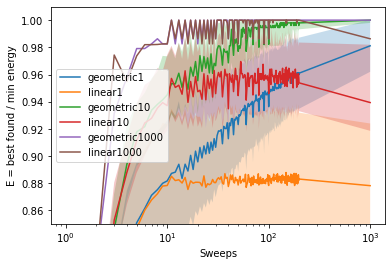

In [664]:
print(min_energy)
fig = plt.figure()
ax = fig.add_subplot(111)
for boot in boots:
    for schedule in schedules:
        ax.plot(sweeps,results['best'][boot][schedule], label=str(schedule) + str(boot))
        if boot == total_reads:
            pass
        else:
            bestnp = np.stack(results['bestci'][boot][schedule], axis=0).T
            ax.fill_between(sweeps,bestnp[0],bestnp[1],alpha=0.25)
plt.xlabel('Sweeps')
plt.ylabel('E = best found / min energy')
plt.legend()
plt.xscale('log')
plt.ylim([0.85,1.01])

(1.0, 200.0)

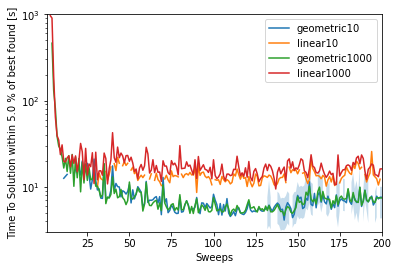

In [671]:
fig = plt.figure()
ax = fig.add_subplot(111)

for boot in boots:
    for schedule in schedules:
        if boot == 1:
            pass
        else:
            ax.plot(sweeps,results['tts'][boot][schedule], label=str(schedule) + str(boot))
            if boot == total_reads:
                pass
            else:
                ttsnp = np.stack(results['ttsci'][boot][schedule], axis=0).T
                ax.fill_between(sweeps,ttsnp[0],ttsnp[1],alpha=0.25)
plt.xlabel('Sweeps')
plt.ylabel('Time To Solution within '+ str(treshold) +' % of best found [s]')
plt.legend()
plt.yscale('log')
plt.ylim([3,1e3])
plt.xlim([1,200])

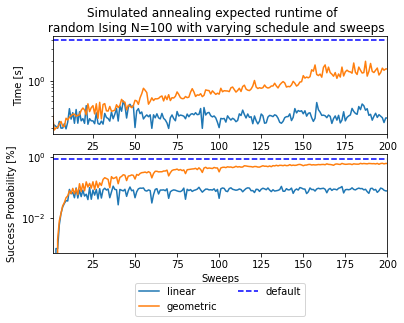

In [669]:
fig, (ax1,ax2) = plt.subplots(2)
fig.suptitle('Simulated annealing expected runtime of \n' +
             ' random Ising N=100 with varying schedule and sweeps')

ax1.semilogy(sweeps, results['t']['linear'], '-', label='linear')
ax1.semilogy(sweeps, results['t']['geometric'], '-', label='geometric')
ax1.hlines(results['t']['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')

ax1.set(ylabel='Time [s]')
ax1.set(xlim=[1,200])


ax2.semilogy(sweeps, results['p'][total_reads]['linear'], '-', label='linear')
ax2.semilogy(sweeps, results['p'][total_reads]['geometric'], '-', label='geometric')
ax2.hlines(results['p'][total_reads]['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')
ax2.set(xlim=[1,200])

ax2.set(ylabel='Success Probability [%]')
ax2.set(xlabel='Sweeps')
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.25))


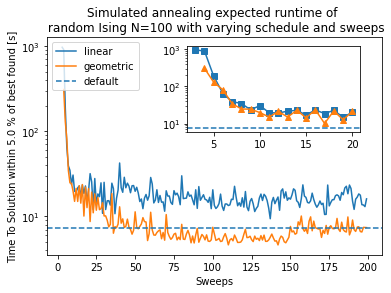

In [509]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.semilogy(sweeps, tts['linear'], '-', label='linear')
ax1.semilogy(sweeps, tts['geometric'], '-', label='geometric')

# Value for the default solution
ttsDefault = tts['geometric'][-1]
plt.axhline(ttsDefault, linestyle='--', label='default')

plt.ylabel('Time To Solution within '+ str(treshold) +' % of best found [s]')
plt.xlabel('Sweeps')
plt.title('Simulated annealing expected runtime of \n' +
          ' random Ising N=100 with varying schedule and sweeps')


plt.legend(loc='upper left')

ax2 = plt.axes([.45, .55, .4, .3])
ax2.semilogy(sweeps[0:20], tts['linear'][0:20], '-s')
ax2.semilogy(sweeps[0:20], tts['geometric'][0:20], '-^')
plt.axhline(ttsDefault, linestyle='--', label='default')


In [339]:
overwrite_pickles = False
s = 0.99  # This is the success probability for the TTS calculation
treshold = 1.0  # This is a percentual treshold of what the minimum energy should be
sweeps = list(chain(np.arange(1, 10, 1), np.arange(10, 30, 2), np.arange(
    30, 50, 5), np.arange(50, 100, 10), np.arange(100, 1001, 100)))
schedules = ['geometric', 'linear']
p = {}
tts = {}
t = {}
best = {}

for instance in range(20):
    p[instance] = {}
    tts[instance] = {}
    t[instance] = {}
    np.random.seed(instance)  # Fixing the random seed to get the same result
    J = np.random.rand(N, N)
    # We only consider upper triangular matrix ignoring the diagonal
    J = np.triu(J, 1)
    h = np.random.rand(N)
    model_random = dimod.BinaryQuadraticModel.from_ising(h, J, offset=0.0)

    default_pickle_name = str(instance) + "_geometric_1000.p"
    default_pickle_name = os.path.join(pickle_path, default_pickle_name)
    if os.path.exists(default_pickle_name) and not overwrite_pickles:
        simAnnSamplesDefault = pickle.load(open(pickle_name, "rb"))
        timeDefault = simAnnSamplesDefault.info['timing']
    else:
        start = time.time()
        simAnnSamplesDefault = simAnnSampler.sample(model_random, num_reads=1000)
        timeDefault = time.time() - start
        simAnnSamplesDefault.info['timing'] = timeDefault
        pickle.dump(simAnnSamplesDefault, open(default_pickle_name, "wb"))
    energies = [datum.energy for datum in simAnnSamplesDefault.data(
        ['energy'], sorted_by='energy')]
    min_energy = energies[0]
    success = min_energy*(1.0 + treshold/100.0)**np.sign(min_energy)
    for schedule in schedules:
        probs = []
        time_to_sol = []
        times = []
        b1000 = []
        for sweep in sweeps:
            pickle_name = str(instance) + "_" + schedule + "_" + str(sweep) + ".p"
            pickle_name = os.path.join(pickle_path, pickle_name)
            if os.path.exists(pickle_name) and not overwrite_pickles:
                samples = pickle.load(open(pickle_name, "rb"))
                time_s = samples.info['timing']
            else:
                start = time.time()
                samples = simAnnSampler.sample(
                    model_random, num_reads=1000, num_sweeps=sweep, beta_schedule_type=schedule)
                time_s = time.time() - start
                samples.info['timing'] = time_s
                pickle.dump(samples, open(pickle_name, "wb"))
            energies = samples.data_vectors['energy']
            occurrences = samples.data_vectors['num_occurrences']
            total_counts = sum(occurrences)
            counts = {}
            for index, energy in enumerate(energies):
                if energy in counts.keys():
                    counts[energy] += occurrences[index]
                else:
                    counts[energy] = occurrences[index]
            pr = sum(counts[key]
                    for key in counts.keys() if key < success)/total_counts
            probs.append(pr)
            if pr == 0:
                time_to_sol.append(None)
            else:
                time_to_sol.append(time_s*math.log10(1-s)/math.log10(1-pr))
            times.append(time_s)
            if min(energies) < min_energy:
                min_energy = min(energies)
            b1000.append(min(energies))
        p[instance][schedule] = probs
        tts[instance][schedule] = time_to_sol
        t[instance][schedule] = times
        best[schedule] = [energy / min_energy for energy in b1000]


In [290]:
# This cell generates Pandas Dataframe with MultiIndex columns 'instance','schedule' and index 'sweeps'
tts_df = pd.DataFrame({(i, j): tts[i][j]
                             for i in tts.keys()
                             for j in tts[i].keys()})
tts_df.columns.names = ['instances', 'schedule']
tts_df.set_axis(sweeps)
tts_df.index.name = 'sweeps'

t_df = pd.DataFrame({(i, j): t[i][j]
                       for i in t.keys()
                       for j in t[i].keys()})
t_df.columns.names = ['instances', 'schedule']
t_df.set_axis(sweeps)
t_df.index.name = 'sweeps'

p_df = pd.DataFrame({(i, j): p[i][j]
                       for i in p.keys()
                       for j in p[i].keys()})
p_df.columns.names = ['instances', 'schedule']
p_df.set_axis(sweeps)
p_df.index.name = 'sweeps'
print(tts_df.xs('geometric', axis=1, level=1, drop_level=False).to_numpy())


[[          nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan 1147.54858427
            nan           nan           nan           nan    

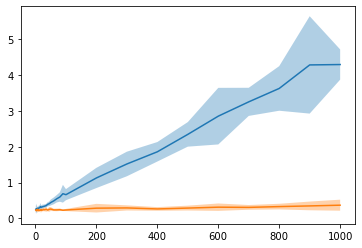

In [228]:
t_meanstd = pd.concat([t_df.groupby(level=1, axis=1).mean(), t_df.groupby(level=1, axis=1).std()], keys=['mean','std'])

for column_name, column_data in t_meanstd.iteritems():
    plt.plot(np.asarray(sweeps), t_meanstd[column_name]['mean'])
    plt.fill_between(np.asarray(sweeps), t_meanstd[column_name]['mean'] - t_meanstd[column_name]['std'], t_meanstd[column_name]['mean'] + t_meanstd[column_name]['std'], alpha=0.35)


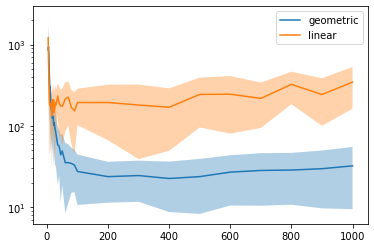

In [252]:
tts_meanstd = pd.concat([tts_df.groupby(level=1, axis=1).median(), tts_df.groupby(level=1, axis=1).quantile(0.25)], keys=['mean','std'])

for column_name, column_data in tts_meanstd.iteritems():
    mask = ~np.isnan(tts_meanstd[column_name]['std'].to_numpy())
    plt.plot(np.asarray(sweeps)[mask], tts_meanstd.xs('mean')[column_name][mask], label=column_name)
    plt.fill_between(
        np.asarray(sweeps)[mask], 
        tts_meanstd[column_name]['mean'][mask] - tts_meanstd[column_name]['std'][mask], 
        tts_meanstd[column_name]['mean'][mask] + tts_meanstd[column_name]['std'][mask], 
        alpha=0.35,
        interpolate = False
        )

plt.yscale('log')
plt.legend()


geometric


/home/bernalde/miniconda3/envs/quipml/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


linear


/home/bernalde/miniconda3/envs/quipml/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


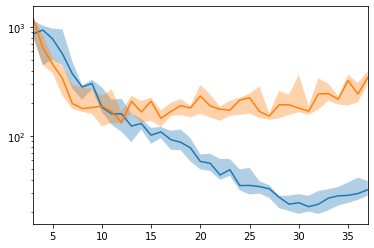

In [340]:
from scipy import stats

fig = plt.figure()
ax = fig.add_subplot(111)

def bootstrap(data, n_boot=10000, ci=68):
    boot_dist = []
    for i in range(int(n_boot)):
        resampler = np.random.randint(0, data.shape[0], data.shape[0])
        sample = data.take(resampler, axis=0)
        # Median ignoring nans instead of mean
        boot_dist.append(np.nanmedian(sample, axis=0))
    b = np.array(boot_dist)
    s1 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.-ci/2.)
    s2 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.+ci/2.)
    return (s1,s2)
    
def tsplotboot(ax, x, data, error_est, **kw):
    if x is None:
        x = np.arange(data.shape[1])
    # Median ignoring nans instead of mean
    est = np.nanmedian(data, axis=0)
    mask = ~np.isnan(est)
    if error_est == 'bootstrap':
        cis = bootstrap(data)
    elif error_est == 'std':
        sd = np.nanstd(data, axis=0)
        cis = (est - sd, est + sd)
    ax.fill_between(x[mask],cis[0][mask],cis[1][mask],alpha=0.35, **kw)
    ax.plot(x[mask],est[mask],**kw)
    ax.margins(x=0)

for column_name, column_data in tts_df.groupby(level=1, axis=1):
    print(column_name)
    data = column_data.to_numpy().T
    tsplotboot(ax, None, data, error_est='bootstrap')
    # tsplotboot(ax, np.asarray(sweeps), data, error_est='bootstrap')

plt.yscale('log')

In [320]:
np.asarray(sweeps)[~np.isnan(est)]

array([   4,    5,    6,    7,    8,    9,   10,   12,   14,   16,   18,
         20,   22,   24,   26,   28,   30,   35,   40,   45,   50,   60,
         70,   80,   90,  100,  200,  300,  400,  500,  600,  700,  800,
        900, 1000])